17:53:32 - cmdstanpy - INFO - Chain [1] start processing
17:53:32 - cmdstanpy - INFO - Chain [1] done processing


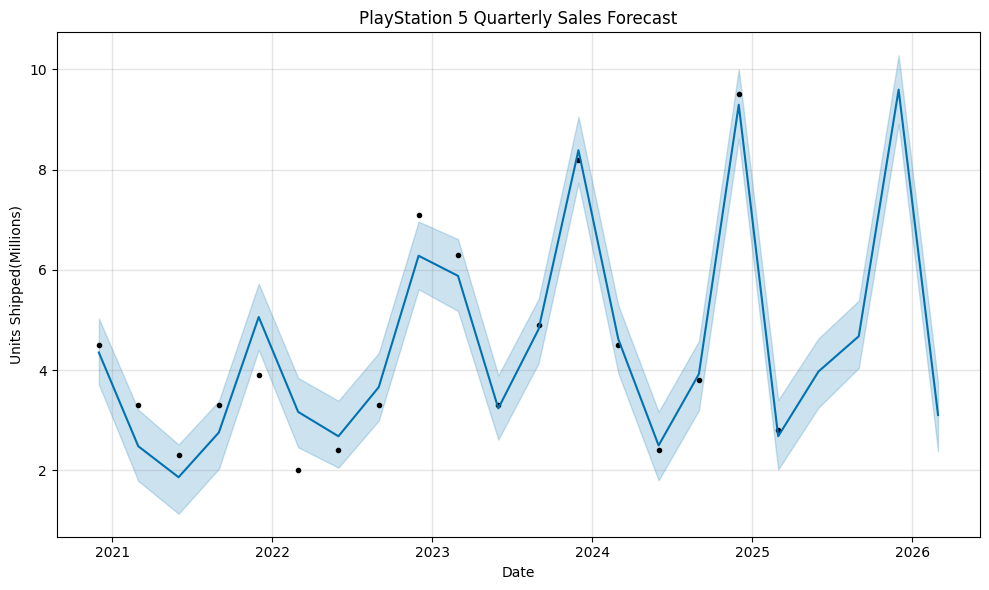

           ds      yhat  yhat_lower  yhat_upper
18 2025-06-01  3.973664    3.252923    4.633182
19 2025-09-01  4.676523    4.043386    5.387385
20 2025-12-01  9.596216    8.911523   10.282226
21 2026-03-01  3.105186    2.382241    3.754740


In [51]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
df =pd.read_csv('ps_5 sales.csv')
df= df.rename(columns={'date': 'ds', 'units_shipped': 'y'})
df['ds'] = pd.to_datetime(df['ds'])
model =Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)
model.fit(df)
future =model.make_future_dataframe(periods=4, freq='3MS')
forecast= model.predict(future)
forecast[['yhat', 'yhat_lower', 'yhat_upper']]= forecast[['yhat','yhat_lower','yhat_upper']].clip(lower=0)
valid_months =[3,6,9,12]
forecast= forecast[forecast['ds'].dt.day == 1]
forecast =forecast[forecast['ds'].dt.month.isin(valid_months)]
forecast_filtered =forecast[forecast['ds']> df['ds'].max()][['ds','yhat','yhat_lower','yhat_upper']]
model.plot(forecast)
plt.title("PlayStation 5 Quarterly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Units Shipped(Millions)")
plt.tight_layout()
plt.show()
print(forecast_filtered)
forecast_filtered.to_csv('ps5_prediction.csv', index=False)

In [50]:
pd.set_option('display.max_rows',None)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']])

           ds      yhat  yhat_lower  yhat_upper
0  2020-12-01  4.353173    3.684594    5.018871
1  2021-03-01  2.482484    1.790664    3.132013
2  2021-06-01  1.864871    1.243522    2.558850
3  2021-09-01  2.757971    2.050684    3.443492
4  2021-12-01  5.060810    4.422938    5.758836
5  2022-03-01  3.168356    2.487145    3.848903
6  2022-06-01  2.681519    2.027163    3.352430
7  2022-09-01  3.660905    2.968250    4.409009
8  2022-12-01  6.282768    5.591821    6.982652
9  2023-03-01  5.881502    5.255657    6.551661
10 2023-06-01  3.238258    2.542609    3.915299
11 2023-09-01  4.817635    4.095697    5.548772
12 2023-12-01  8.388213    7.699689    9.065766
13 2024-03-01  4.617979    3.964334    5.279490
14 2024-06-01  2.499341    1.789957    3.231754
15 2024-09-01  3.923668    3.251771    4.630118
16 2024-12-01  9.294916    8.568812    9.961990
17 2025-03-01  2.681933    2.024351    3.406478
18 2025-06-01  3.973664    3.319023    4.667606
19 2025-09-01  4.676523    3.985815    5

17:52:13 - cmdstanpy - INFO - Chain [1] start processing
17:52:13 - cmdstanpy - INFO - Chain [1] done processing


2024 Forecast vs Actual:
           ds      yhat  actual
13 2024-03-01  2.214645     4.5
14 2024-06-01  2.828607     2.4
15 2024-09-01  3.574177     3.8
16 2024-12-01  6.391827     9.5

MAE: 1.51, RMSE: 1.94


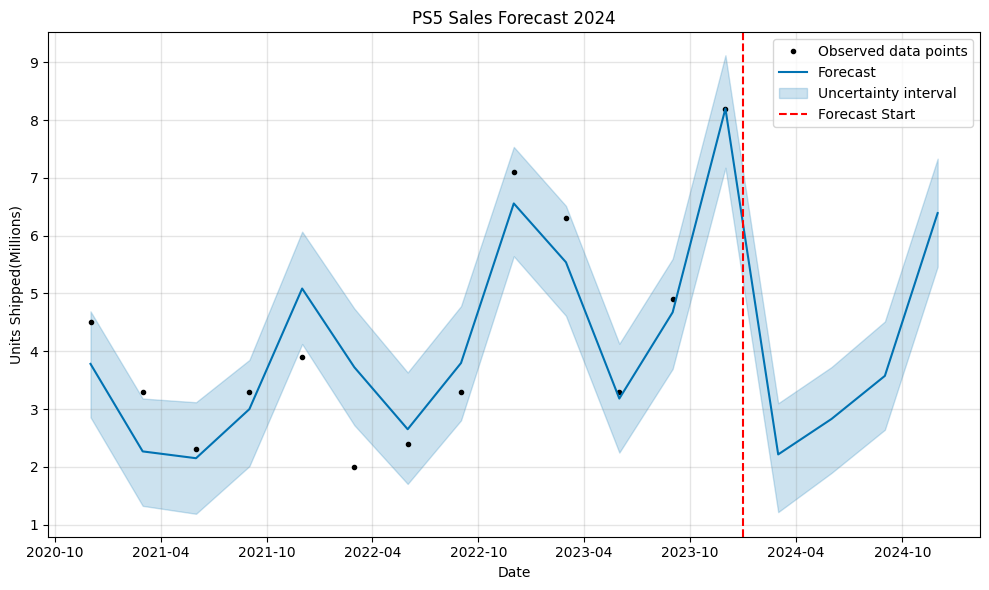

In [45]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
df_full =pd.read_csv('ps_5 sales.csv')
df_full= df_full.rename(columns={'date': 'ds', 'units_shipped': 'y'})
df_full['ds'] = pd.to_datetime(df_full['ds'])
df_full =df_full.sort_values('ds')
train_df= df_full[df_full['ds'] < '2024-01-01']
test_df = df_full[(df_full['ds'] >= '2024-01-01') & (df_full['ds'] < '2025-01-01')]
model =Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)
model.fit(train_df)
future =model.make_future_dataframe(periods=4,freq='3MS')
forecast= model.predict(future)
forecast[['yhat', 'yhat_lower', 'yhat_upper']] =forecast[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)
valid_months =[3, 6, 9, 12]
forecast= forecast[forecast['ds'].dt.day== 1]
forecast =forecast[forecast['ds'].dt.month.isin(valid_months)]
forecast_2024= forecast[(forecast['ds'] >= '2024-01-01') &(forecast['ds'] < '2025-01-01')]
y_true= test_df['y'].values
y_pred =forecast_2024['yhat'].values
mae =mean_absolute_error(y_true,y_pred)
rmse = np.sqrt(mean_squared_error(y_true,y_pred))
print("2024 Forecast vs Actual:")
print(forecast_2024[['ds', 'yhat']].assign(actual=y_true))
print(f"\nMAE: {mae:.2f}, RMSE: {rmse:.2f}")
model.plot(forecast)
plt.axvline(pd.to_datetime("2024-01-01"), color='red', linestyle='--', label="Forecast Start")
plt.title("PS5 Sales Forecast 2024")
plt.xlabel("Date")
plt.ylabel("Units Shipped(Millions)")
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
forecast_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].assign(actual=y_true)



,ds,yhat,yhat_lower,yhat_upper,actual
13,2024-03-01,2.214645,1.216012,3.099503,4.5
14,2024-06-01,2.828607,1.894531,3.727009,2.4
15,2024-09-01,3.574177,2.641461,4.515449,3.8
16,2024-12-01,6.391827,5.463066,7.333655,9.5


In [47]:
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"(MAE): {mae:.3f}")
print(f"(RMSE): {rmse:.3f}")

(MAE): 1.512
(RMSE): 1.944
